In [1]:
# 必要ライブラリ
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statistics import mean, median,variance,stdev
import datetime as dt
import burst_detection as bd
import numpy as np

## 移動平均によるバースト

In [2]:
#テキスト日付をdate日付にする
def text_date_to_date(l):
    if l[0] <= 9:
        m = '0' + str( l[0] )
    else:
        m = str( l[0] )
    if l[1] <= 9:
        d = '0' + str( l[1] )
    else:
        d = str( l[1] )
    
    d = m + '/' + d + '/2015'
    date = dt.datetime.strptime(d, '%m/%d/%Y').date()
    return(date)

In [3]:
# 移動平均
def move_average(target, split_num):
    ave_l = []
    for i, l in enumerate(target):
        if i < split_num:
            zero_index = split_num - i
            mean = np.mean( ( target[ 0 : i ] + np.zeros( zero_index ).tolist() ) )
            ave_l.append( mean )
        else:
            mean = np.mean(target[ i - split_num : i ])
            ave_l.append( mean )
    return( ave_l )
    

In [4]:
def convert_list(lines):
    list_d = []
    for line in lines:
        l_list = line.split('\t')
        list_d.append( [ int(l_list[0]), int(l_list[1]), int(l_list[2]) ] )
        
    return(list_d)

In [5]:
def date_hit_list(list_d):
    list_date_hit = []
    dates = []
    hits = []
    for i, l in enumerate(list_d):
        date = text_date_to_date(l)        
        dates.append( date )
        hits.append( l[2] )
    list_date_hit.append(dates)
    list_date_hit.append(hits)
    return(list_date_hit)

In [6]:
#データ準備
fp_h = open("hk_sakura_cleaning.txt", "r")
fp_h_all = open("hk_all_cleaning.txt", "r")
line = fp_h.readlines()
line_all = fp_h_all.readlines()

list_d = convert_list(line)
list_d_all = convert_list(line_all)

#x軸を作成（日付），y軸を作成（件数），
d = date_hit_list(list_d)
dates = d[0]
hits = d[1]

d_all = date_hit_list(list_d_all)
# dates_all = date_hit_list_all[0]
hits_all = d_all[1]

fp_h.close()
fp_h_all.close()


In [7]:
CREATURE_N = 5
STANDARD_N = 7

#全体平均
sum_d = sum([ l[2] for l in list_d ])
len_d = len(list_d)
print(sum_d)
print(len_d)
total_ave = sum_d / len_d
print( total_ave)

#5日平均
# #移動平均 same　→　arg1の数だけ移動平均を計算してくれる　vははみださない
# #full　→　vがはみだす
c_ave = move_average(hits, CREATURE_N)

#7日平均
s_ave = move_average(hits, STANDARD_N)

3386
318
10.647798742138365


In [8]:
len(hits)

318

In [9]:
#見頃推定

dict_n = {}
if CREATURE_N > STANDARD_N:
    dict_n['big_n'] = CREATURE_N
    dict_n['small_n'] = STANDARD_N
else:
    dict_n['big_n'] = STANDARD_N
    dict_n['small_n'] = CREATURE_N
CONTINUE_N = dict_n['small_n']/2

big_ave = s_ave
small_ave = c_ave
infer = []
continue_cnt = 0
for i, l in enumerate(list_d):
    if small_ave[i] < big_ave[i]:
        continue_cnt = 0
    else:
        continue_cnt += 1
        if continue_cnt >= CONTINUE_N and list_d[ i - 1 ][2] >= total_ave:
            infer.append( [ l[0], l[1] ] )

print(infer)

[[2, 19], [2, 20], [2, 21], [2, 22], [3, 1], [3, 2], [3, 3], [3, 4], [3, 13], [3, 27], [3, 31], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 15], [4, 22], [4, 23], [4, 24], [4, 25], [4, 26], [4, 27], [4, 28], [4, 29], [4, 30], [5, 1], [12, 23], [12, 25], [12, 26], [12, 27], [12, 28], [12, 29]]


In [10]:
START_DATE = dt.date(2015, 3, 1)
END_DATE = dt.date(2015, 4,30)
#x軸を作成（日付），y軸を作成（件数），
x_dates = []
y_hits = []
for i, l in enumerate(list_d):
    x_date = text_date_to_date(l)
    
    if x_date < START_DATE:
        continue
        
    x_dates.append( x_date )
    y_hits.append( l[2] )
    if x_date == END_DATE:
        break

# inferのdate配列も用意 開始と終了の二次元配列にする
inters = []
inter = []
for i, l in enumerate(infer):
    check_date = text_date_to_date(l)
    if not inter:
        inter = [ check_date, check_date ]
    
    if ( check_date - inter[1] ).days > 1:
        inters.append(inter)
        inter = [ check_date, check_date ]
    else:
        inter[1] = check_date
        if i+1 == len(infer):
            inters.append(inter)



In [11]:
[i for i in inters]

[[datetime.date(2015, 2, 19), datetime.date(2015, 2, 22)],
 [datetime.date(2015, 3, 1), datetime.date(2015, 3, 4)],
 [datetime.date(2015, 3, 13), datetime.date(2015, 3, 13)],
 [datetime.date(2015, 3, 27), datetime.date(2015, 3, 27)],
 [datetime.date(2015, 3, 31), datetime.date(2015, 4, 6)],
 [datetime.date(2015, 4, 15), datetime.date(2015, 4, 15)],
 [datetime.date(2015, 4, 22), datetime.date(2015, 5, 1)],
 [datetime.date(2015, 12, 23), datetime.date(2015, 12, 23)],
 [datetime.date(2015, 12, 25), datetime.date(2015, 12, 29)]]

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12498 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20214 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12498 missing from current font.
  font.set_

FileNotFoundError: [Errno 2] No such file or directory: './png/tk_plot.png'

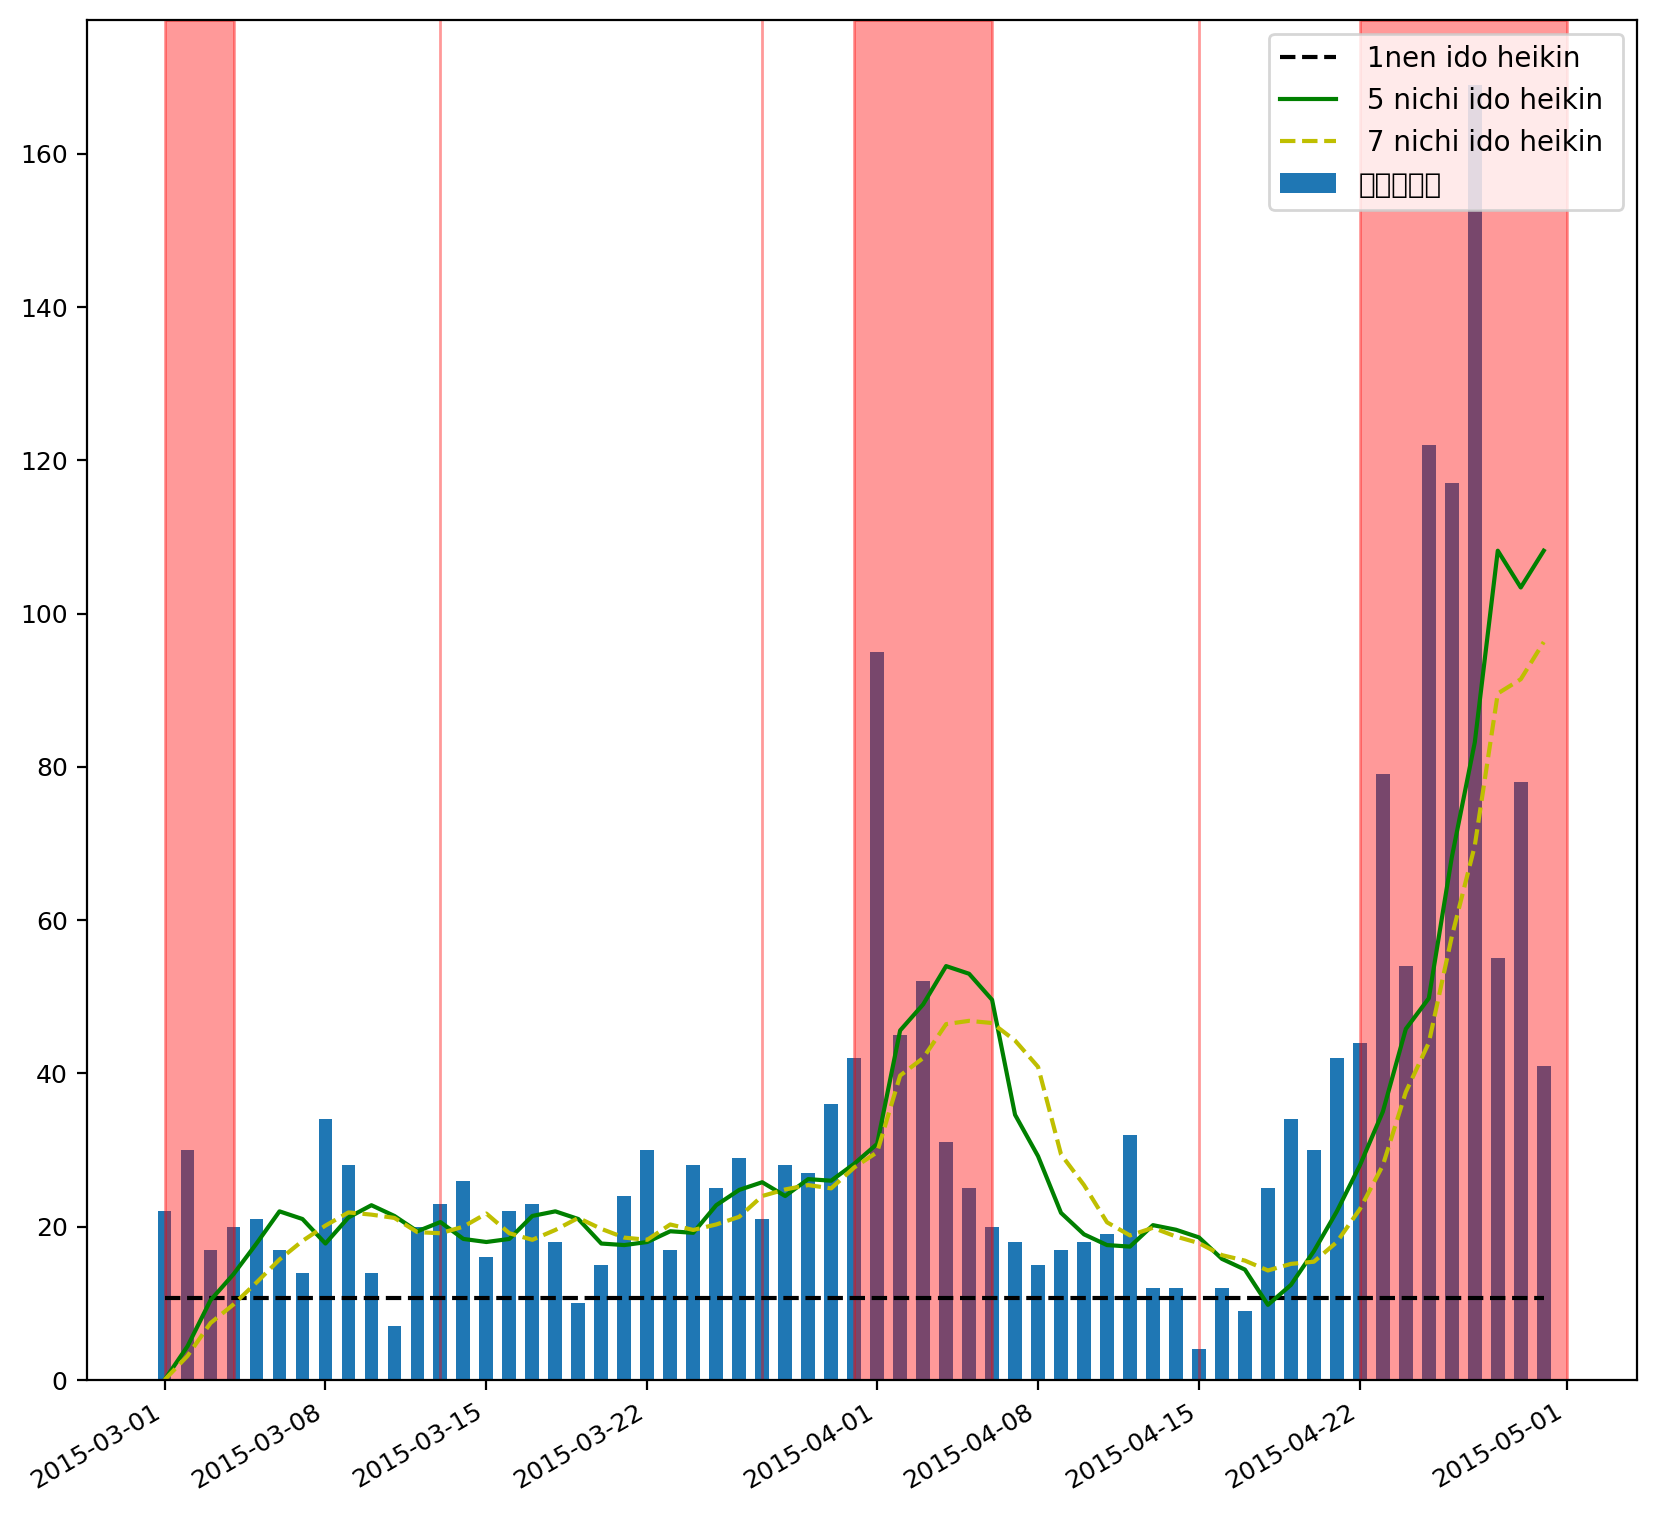

In [12]:
x = x_dates

y_h = y_hits
y_t_ave = [ total_ave ] * len(y_h)

y_c_ave = move_average(y_h, CREATURE_N)
y_s_ave =  move_average(y_h, STANDARD_N)

fig = plt.figure(figsize=(10,10),dpi=200)
ax = fig.add_subplot(1, 1, 1)

ax.bar( x, y_h, width=0.6, label=' hit kensu ')
ax.plot(x,y_t_ave,'k--', label=' 1nen ido heikin ')
ax.plot(x,y_c_ave,'g', label=' 5 nichi ido heikin ')
ax.plot(x,y_s_ave,'y--', label=' 7 nichi ido heikin ')

for inter in inters:
    if inter[0] in x:
        ax.axvspan(inter[0], inter[1], alpha=0.4, color="r", label='migoro')


# ax.set_xticklabels(x,rotation=30)

ax.tick_params(axis='both',labelsize=9)

ax.legend()

# plt.grid()
# plt.show()
fig.autofmt_xdate()
# 保存
plt.savefig("tk_plot.png")

In [ ]:
print(infer)

## kleinbergのバースト

In [ ]:
#データ準備
fp_h = open("hk_sakura_cleaning.txt", "r")
fp_h_all = open("hk_all_cleaning.txt", "r")
line = fp_h.readlines()
line_all = fp_h_all.readlines()

list_d = convert_list(line)
list_d_all = convert_list(line_all)

#x軸を作成（日付），y軸を作成（件数），
d = date_hit_list(list_d)
dates = d[0]
hits = d[1]

d_all = date_hit_list(list_d_all)
# dates_all = date_hit_list_all[0]
hits_all = d_all[1]

fp_h.close()
fp_h_all.close()

In [ ]:
#number of target events at each time point
r = np.array(hits, dtype=float)
#total number of events at each time point
d = np.array(hits_all, dtype=float)
#number of time points
n = len(r)

q, d, r, p = bd.burst_detection(r,d,n,s=2,gamma=1,smooth_win=1)
bursts = bd.enumerate_bursts(q, 'burstLabel')

#find weight of bursts
weighted_bursts = bd.burst_weights(bursts,r,d,p)

print('observed probabilities: ')
# print(str(r/d) )

print( 'optimal state sequence: ')
print(str(q.T) )

print( 'baseline probability: ' + str(p[0]) )

print( 'bursty probability: ' + str(p[1]) )

print( 'weighted bursts:' )
print( weighted_bursts)

In [ ]:
# burstラベルから期間を確認する
dates[312:315]